# Project 4, APS1070 Fall 2023
#### **Linear Regression -  14 points**
**Deadline: Dec 1st, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: 
*   Your **student number**:

### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.


Ref: https://stackoverflow.com/a/64487858

In [1]:
%%shell
jupyter nbconvert --to html /content/APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 1354092 bytes to /content/APS1070_Project_4.html


## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts the number of shares on social networks.

For this purpose, we are going to use a dataset containing 39,644 instances, where each instance is a set of 61 heterogeneous features about articles published by Mashable in a period of two years. Our goal is to use these features to predict the `shares` column, which is the number of shares of an article in social networks. We will make our predictions by implementing linear regression.

The dataset has been sourced from the Machine Learning Repository of University of California, Irvine [Online News Popularity Data Set (UC Irvine)](https://archive.ics.uci.edu/dataset/332/online+news+popularity).
The UCI page mentions the following publication as the original source of the data set:

*K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence, September, Coimbra, Portugal*

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/Sabaae/Dataset/main/Online_News_Popularity.csv',
    index_col=0
)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Keep the numerical features only. Then, standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

In [3]:
#1.print the frame
df

,article_url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,amazon-instant-video-browser,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,ap-samsung-sponsored-tweets,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,apple-40-billion-app-downloads,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,astronaut-notre-dame-bcs,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,att-u-verse-apps,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,samsung-app-autism,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,seth-rogen-james-franco-will-live-tweet-the-in...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,son-pays-off-mortgage,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,ukraine-blasts,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [4]:
from sklearn.model_selection import train_test_split
  #drop the non-numerical features
data_raw = df.drop(columns=['article_url'])

Y = data_raw['shares'].values
X = data_raw.drop(columns=['shares']).values

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2,  random_state=1)

#standardize, mean & std only based on training data
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_std = np.zeros_like(X_train)
nonzero_std_mask = std != 0
X_train_std[:, nonzero_std_mask] = (X_train[:, nonzero_std_mask] - mean[nonzero_std_mask]) / std[nonzero_std_mask]
X_val_std = np.zeros_like(X_val)
X_val_std[:, nonzero_std_mask] = (X_val[:, nonzero_std_mask] - mean[nonzero_std_mask]) / std[nonzero_std_mask]

#insert a first column of all 1
X_train_std = np.c_[np.ones(X_train_std.shape[0]), X_train_std]
X_val_std = np.c_[np.ones(X_val_std.shape[0]), X_val_std]

3.Explain why we should not insert the column of  1 s prior to standardization. [0.5]

**Answer:**
adding 1s on the first column is equal to add a bias to the set, which is independently from each feature, and adding 1 prior to standardization will affect standardizing cause it will introduce a constant to each data. So we should not insert the column of 1s prior to standardization.

## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [7]:
from sklearn.metrics import mean_squared_error
from scipy.linalg import inv
#θ=(XT X)−1 XT Y
direct_sol = np.dot(inv(np.dot(X_train_std.T, X_train_std)), np.dot(X_train_std.T, y_train))

y_train_pre = np.dot(X_train_std, direct_sol)
y_val_pre = np.dot(X_val_std, direct_sol)

val_direct_rmse = np.sqrt(mean_squared_error(y_val_pre, y_val))

print('RMSE for training set is ', np.sqrt(mean_squared_error(y_train_pre, y_train)))
print('RMSE for validation set is ', val_direct_rmse)

RMSE for training set is  12166.03665232997
RMSE for validation set is  8266.782865779363


## Part 3 - Full Batch Gradient Descent [4 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).
  Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. **[0.5]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

**Hint**: Initialize your weights with small random numbers (<$0.001$)

* Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? **[0.5]**

In [8]:
import time
from matplotlib import pyplot as plt
def full_batch_GD(X_train, y_train, X_val, y_val, learning_rate, convergence_threshold):
  start_time = time.time() ## Records current time
  np.random.seed(2)
  #store RMSE for future plot
  RMSEs_train = []
  RMSEs_val = []

  #initial weights
  w = (np.random.random(X_val.shape[1]))/1000

  while True:
    y_val_pre = np.dot(X_val, w.T)
    rmse_val_pre = np.sqrt(mean_squared_error(y_val_pre, y_val))
    RMSEs_val.append(np.sqrt(mean_squared_error(y_val_pre, y_val)))
    # print(rmse_val_pre)

    y_train_pre = np.dot(X_train, w.T)
    RMSEs_train.append(np.sqrt(mean_squared_error(y_train_pre, y_train)))

    gradient = (1/len(y_train_pre) * np.dot(X_train.T, y_train_pre - y_train))
    w = w - learning_rate * gradient

    if rmse_val_pre <= convergence_threshold:
      break
  plt.title('training RMSE and the validation RMSE vs. epoch ')
  plt.plot(range(len(RMSEs_train)), RMSEs_train, label = 'training data')
  plt.plot(range(len(RMSEs_train)), RMSEs_val, label = 'validation data')
  plt.xlabel('epoches')
  plt.ylabel('RMSE')
  plt.legend()

  print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 0.6771414279937744 (s) ---


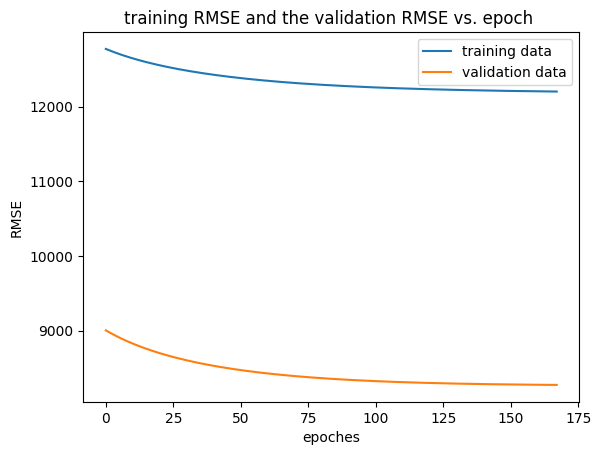

In [9]:
full_batch_GD(X_train_std, y_train, X_val_std, y_val, 0.01, 1.001 * val_direct_rmse)

Comment on overfitting/underfitting by observing the training and validation RMSE [1]

**Answer**

1. we can see that the RMSE is high at the left side which is at the beginning, the model is underfit.

2. And for overfit, since the validation data's RMSE is always smaller than the training data's RMSE, we can say that there has no overfit in the model.




Explain the difference between epoch and iteration in the Gradient descent algorithm (SGD/mini-batch)? [0.5]

**Answer**

in SGD/mini-batch GD, an epoch may needs several iteration cause an epoch means using the whole data set while in SGD/mini-batch GD, each iteration only uses a potion of the whole data set.

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

In [10]:
def mini_batch_GD(X_train, y_train, X_val, y_val, learning_rate, batch_size, convergence_threshold):
  start_time = time.time() ## Records current time
  np.random.seed(2)
  #store RMSE for future plot
  RMSEs_train = []
  RMSEs_val = []
  elaps_time = []

  #initial weights
  w = (np.random.random(X_val.shape[1]))/1000
  while True:


    for i in range(0, X_train.shape[0], batch_size):
      X_train_batch = X_train[i : i + batch_size]
      y_train_batch = y_train[i : i + batch_size]
      y_pre_batch = np.dot(X_train_batch, w.T)
      gradient = np.dot(X_train_batch.T, y_pre_batch - y_train_batch)/len(y_pre_batch)
      w = w - learning_rate * gradient

    y_val_pre = np.dot(X_val, w.T)
    y_train_pre = np.dot(X_train, w.T)
    rmse_val_pre = np.sqrt(mean_squared_error(y_val_pre, y_val))

    # print(np.sqrt(mean_squared_error(y_val_pre, y_val)))
    RMSEs_val.append(np.sqrt(mean_squared_error(y_val_pre, y_val)))
    RMSEs_train.append(np.sqrt(mean_squared_error(y_train_pre, y_train)))
    elaps_time.append(time.time() - start_time)

    if len(elaps_time) > 1:
      if RMSEs_val[-1] > 2 * RMSEs_val[0] or RMSEs_val[-1] > RMSEs_val[-2]:
        # print('diverge at size ', batch_size)
        return None, None, None, None

    if rmse_val_pre <= convergence_threshold:
      break

    #shuffle the training set
    permutation = list(np.random.permutation(X_train.shape[0]))
    X_train = X_train[permutation]
    y_train = y_train[permutation]

  # RMSEs_train.pop(0)
  # RMSEs_val.pop(0)
  # elaps_time.pop(0)

  return w, RMSEs_train, RMSEs_val, elaps_time

# w, RMSEs_train, RMSEs_val, elaps_time = mini_batch_GD(X_train_std, y_train, X_val_std, y_val, 0.01, 512, 1.001 * val_direct_rmse)
# print(RMSEs_train)
# print(RMSEs_val)

In [11]:
RMSE_train_list = []
RMSE_val_list = []
elaps_time_list = []
batch_size_list = []
total_time = []
not_converged_batch = []

for i in range(30):
  if len(total_time) == 8:
    break

  w, RMSEs_train, RMSEs_val, elaps_time = mini_batch_GD(X_train_std, y_train, X_val_std, y_val, 0.01, 2**i, 1.001 * val_direct_rmse)

  if RMSEs_train is None:
    print('batch ', str(2**i), ' not converged')
    not_converged_batch.append(2**i)
  if RMSEs_train is not None:
    RMSE_train_list.append(RMSEs_train)
    batch_size_list.append(2**i)
  if RMSEs_val is not None:
    RMSE_val_list.append(RMSEs_val)
  if elaps_time is not None:
    elaps_time_list.append(elaps_time)
    total_time.append(elaps_time[-1])

batch  1  not converged
batch  2  not converged
batch  4  not converged
batch  8  not converged
batch  16  not converged
batch  32  not converged
batch  64  not converged
batch  128  not converged


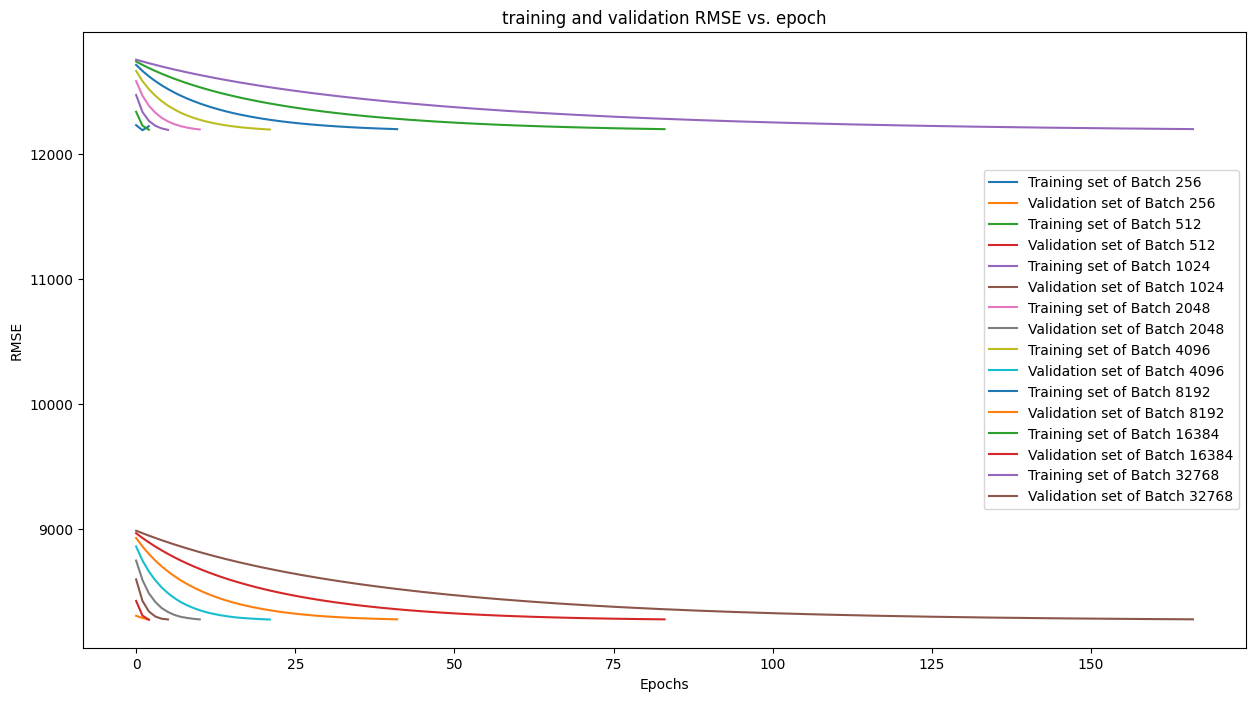

In [12]:
# Plot training and validation RMSE vs. epoch for all the converging batch sizes (some batch sizes might not converge) in a figure.
plt.figure(figsize = (15, 8))
plt.title('training and validation RMSE vs. epoch')
for i in range(len(RMSE_train_list)):
  plt.plot(RMSE_train_list[i], label = 'Training set of Batch ' + str(batch_size_list[i]))
  plt.plot(RMSE_val_list[i], label = 'Validation set of Batch ' + str(batch_size_list[i]))
plt.xlabel('Epochs')
plt.ylabel("RMSE")
plt.legend()

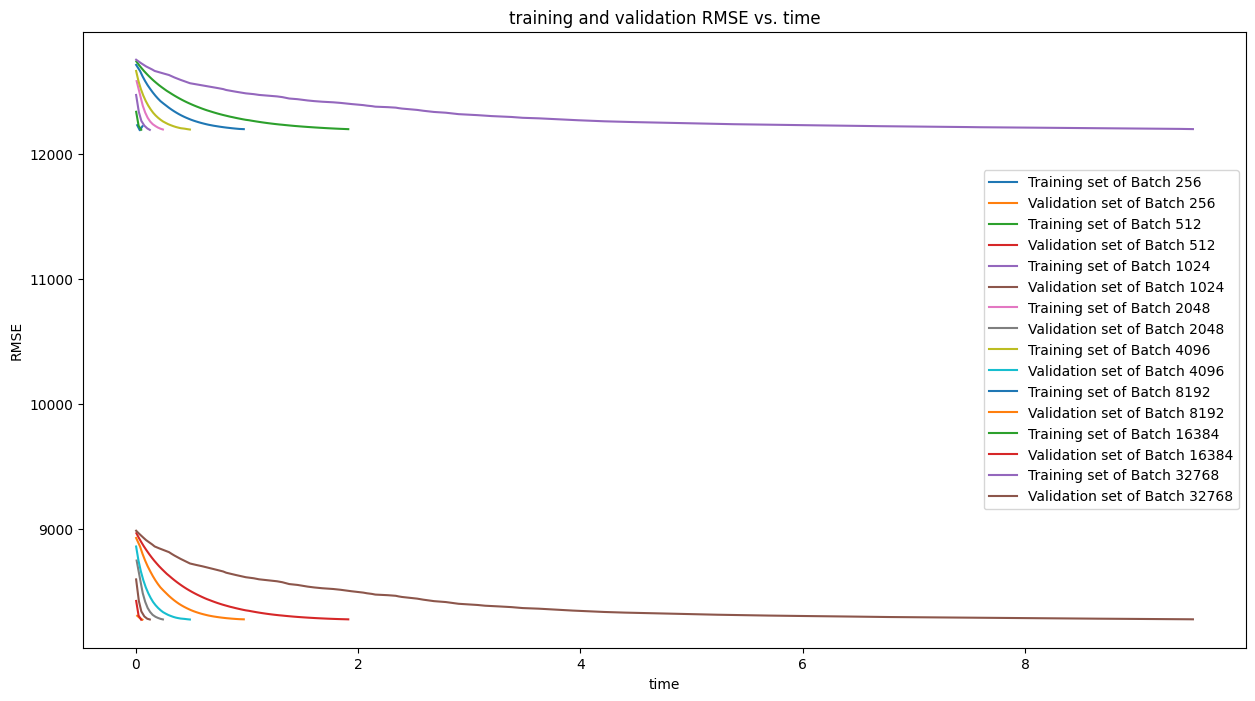

In [13]:
#Plot training and validation RMSE vs. time for all the converging batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. [0.5]
plt.figure(figsize = (15, 8))
plt.title('training and validation RMSE vs. time')
for i in range(len(RMSE_train_list)):
  plt.plot(elaps_time_list[i], RMSE_train_list[i], label = 'Training set of Batch ' + str(batch_size_list[i]))
  plt.plot(elaps_time_list[i], RMSE_val_list[i], label = 'Validation set of Batch ' + str(batch_size_list[i]))
plt.xlabel('time')
plt.ylabel("RMSE")
plt.legend()

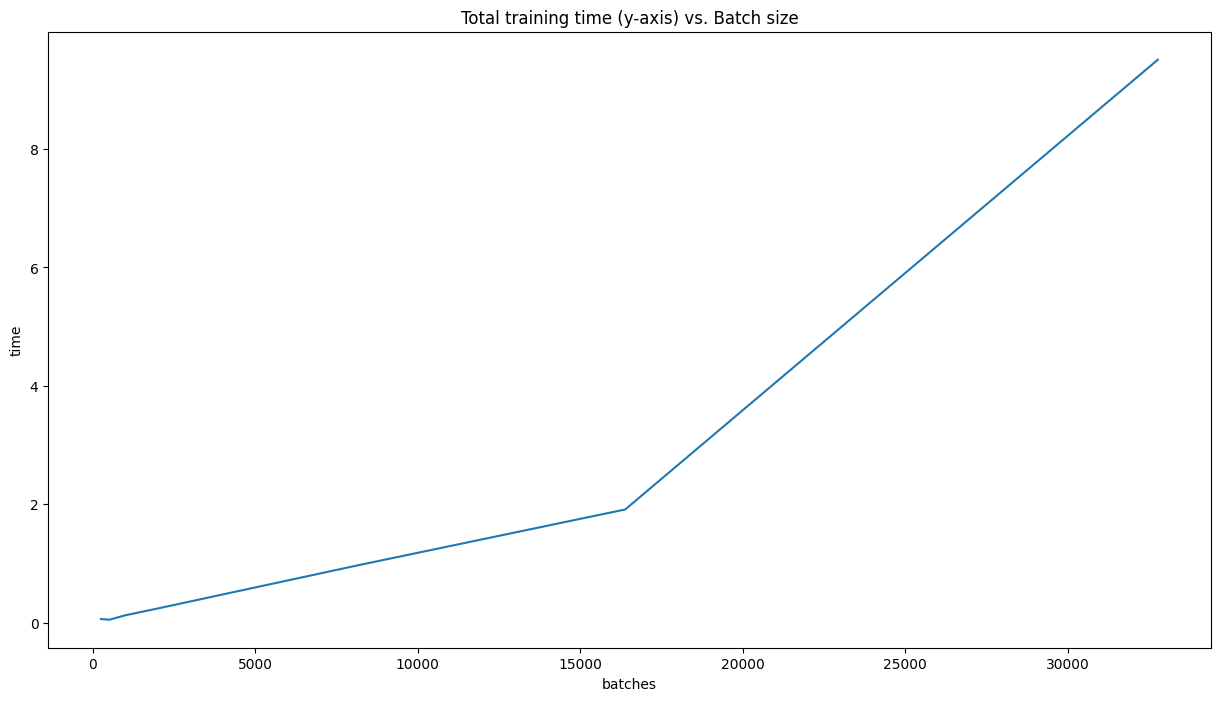

In [14]:
#Plot Total training time (y-axis) vs. Batch size (x-axis). [0.5]
plt.figure(figsize = (15, 8))
plt.title('Total training time (y-axis) vs. Batch size')
plt.plot(batch_size_list, total_time)
plt.xlabel('batches')
plt.ylabel("time")
plt.show()

**Answer**

1. before get 8 converged batch size, we can see that the size under 256 is all diverged.
2. from graph 1, which is the 'training and validation RMSE vs. epoch', we can see that the saller batch cause faster convergence, and we can get the same conclution from graph 2.
3. from graph 3, we can see that the time needed is increasing when the batch size get lager, cause with smaller data set, the noise may help us to converge the model.

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

In [15]:
#1.
times = 0
batch_size = []
learning_rate_list = []
training_RMSE = []
validation_RMSE = []

for not_converged_size in not_converged_batch:
  if times == 3:
    break
  for lr in np.arange(0.01, 0, -0.001):
    w, RMSEs_train, RMSEs_val, elaps_time = mini_batch_GD(X_train_std, y_train, X_val_std, y_val, lr, not_converged_size, 1.001 * val_direct_rmse)
    if w is not None:
      batch_size.append(not_converged_size)
      learning_rate_list.append(lr)
      training_RMSE.append(RMSEs_train[-1])
      validation_RMSE.append(RMSEs_val[-1])
      times = times + 1
      break

table_question1 = pd.DataFrame({'batch_size':batch_size, 'learning_rate':learning_rate_list, 'training_RMSE':training_RMSE, 'validation_RMSE':validation_RMSE})
print(table_question1)

   batch_size  learning_rate  training_RMSE  validation_RMSE
0          32          0.001   12188.772397      8269.705634
1          64          0.003   12393.605779      8273.213845
2         128          0.006   12391.975435      8273.374778


512


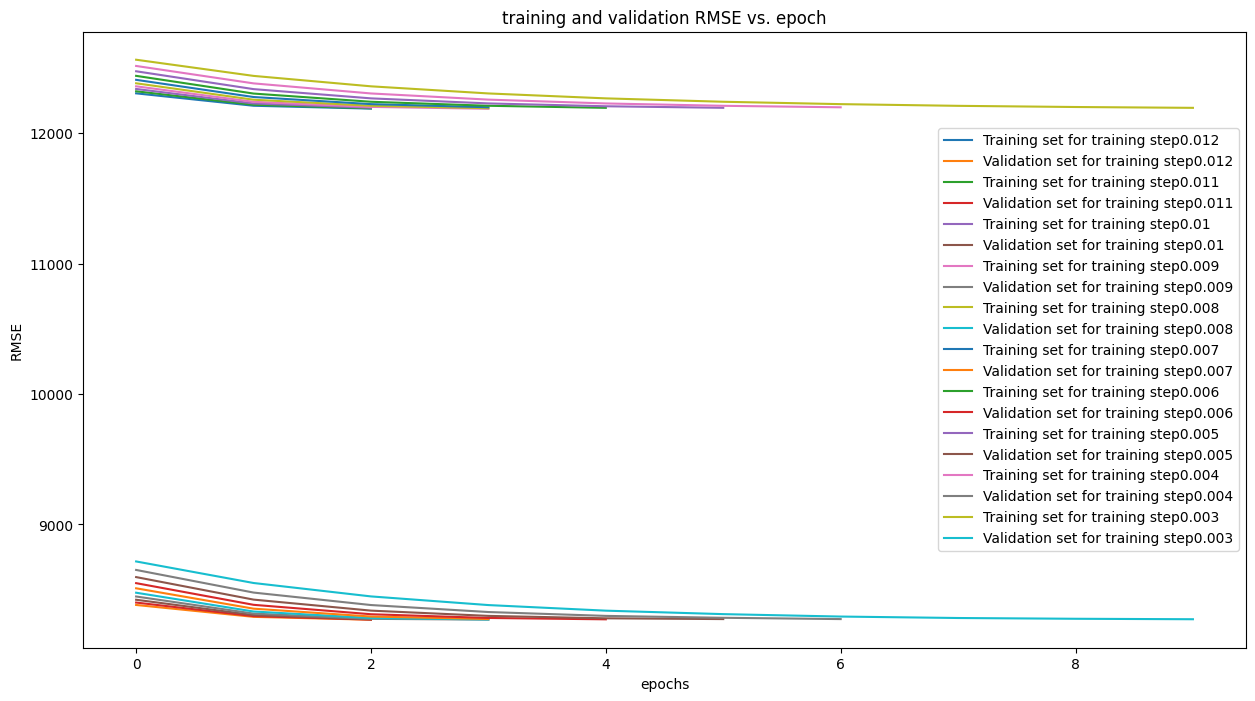

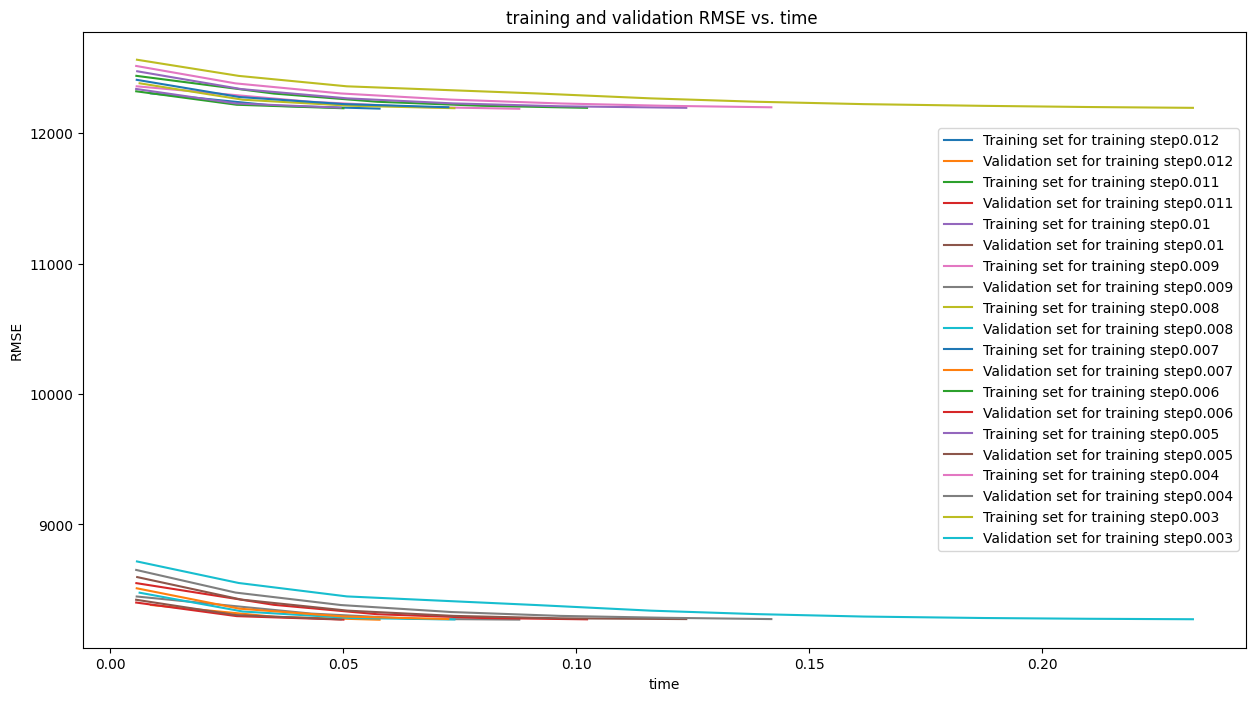

In [16]:
#2
min_time = min(total_time)
min_index = total_time.index(min_time)
min_batch_size = batch_size_list[min_index]
print(min_batch_size)

trying_training_RMSE = []
trying_val_RMSE = []
trying_time_list = []
trying_lr = []

for lr in np.arange(0.012, 0, -0.001):
  if(len(trying_training_RMSE) == 10):
    break
  w, RMSEs_train, RMSEs_val, elaps_time = mini_batch_GD(X_train_std, y_train, X_val_std, y_val, lr, min_batch_size, 1.001 * val_direct_rmse)
  # print(RMSEs_train)
  if w is not None:
    trying_training_RMSE.append(RMSEs_train)
    trying_val_RMSE.append(RMSEs_val)
    trying_time_list.append(elaps_time)
    trying_lr.append(lr)

#first plot
plt.figure(figsize = (15, 8))
plt.title('training and validation RMSE vs. epoch')
for i in range(len(trying_training_RMSE)):
  plt.plot(trying_training_RMSE[i], label = 'Training set for training step' + str(round(trying_lr[i], 4)))
  plt.plot(trying_val_RMSE[i], label = 'Validation set for training step' + str(round(trying_lr[i], 4)))
plt.xlabel('epochs')
plt.ylabel("RMSE")
plt.legend()
#second plot
plt.figure(figsize = (15, 8))
plt.title('training and validation RMSE vs. time ')
for i in range(len(trying_training_RMSE)):
  plt.plot(trying_time_list[i], trying_training_RMSE[i], label = 'Training set for training step' + str(round(trying_lr[i], 4)))
  plt.plot(trying_time_list[i], trying_val_RMSE[i], label = 'Validation set for training step' + str(round(trying_lr[i], 4)))
plt.xlabel('time')
plt.ylabel("RMSE")
plt.legend()

**Answer**

from the two graphs we can see that for small learning rate, we need more time and more epoches to converge, on the contrary, if we use large learning rate, it cause less time and epoches to converge, so we need to find a point that performs best, from the graph we can say that the best learning rate is 0.011.